In [2]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\alexandre\appdata\local\programs\python\python37-32\python.exe -m pip install --upgrade pip' command.


In [8]:
from PIL import Image
import math
import numpy as np

In [3]:
from skimage import io
img = io.imread('resized/IMG_2034.jpeg')

In [7]:
img.shape

(300, 300, 3)

In [21]:
def RGB2gray(image):
    #image = img_as_float(image)
    new = np.zeros([image.shape[0], image.shape[1]])
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            pixel = image[i,j]
            gray = pixel[0]*0.299 + pixel[1]*0.587 + pixel[2]*0.114
            
            new[i,j] = int(gray)
    
    return new

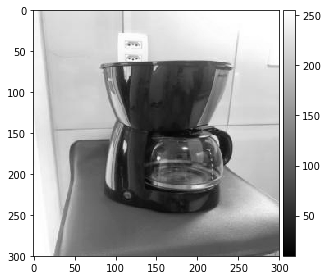

In [24]:
import matplotlib.pyplot as plt
gray = RGB2gray(img)
io.imshow(gray, cmap=plt.cm.gray)

In [46]:
def LogImage(imagegray):
    width, height = imagegray.shape
    
    new = np.zeros([width, height])
    
    for i in range(width):
        for j in range(height):
            pixel = imagegray[i,j]
            logged = (255/8)*math.log(pixel + 1,2)
            new[i,j] = logged
    
    return new

In [47]:
def dist(i,j,zerox,zeroy):
    return math.sqrt((zerox - i)**2 + (zeroy-j)**2)

In [56]:
def gera_gradiente(imagegray):
    width, height = imagegray.shape
    midw = width/2
    midh = height/2
    maxDist = dist(0,0,midw,midh)
    
    new = np.zeros([width, height])
    
    for i in range(width):
        for j in range(height):
            #pixel = image.getpixel((i,j))
            tuple_pixel = int(255*((dist(i,j,midw,midh))/maxDist))
            new[i,j] = min(imagegray[i,j] + tuple_pixel,255)
    return new

In [57]:
grad = gera_gradiente(gray)

In [58]:
logged = LogImage(gray)

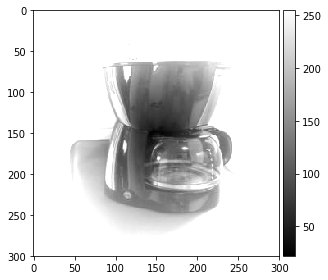

In [59]:
io.imshow(grad, cmap=plt.cm.gray)

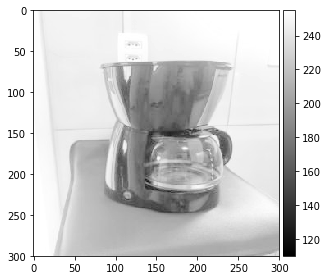

In [51]:
io.imshow(logged, cmap=plt.cm.gray)

In [76]:
def media_filtro(image):
    width, height = image.shape
    new = np.zeros([width, height])
    
    for i in range(0,width):
        for j in range(1,height):
            sum_ = 0
            num = 0
            min_i = i-1
            if i == 0:
                min_i = i
            max_i = i+1
            if i == width:
                min_i = i
            min_j = j-1
            if j == 0:
                min_j = j
            max_j = j+1
            if j == height:
                max_j = j
            
            for x in range(min_i,max_i):
                for y in range(min_j,max_j):
                    sum_ += image[x,y]
                    num += 1
            media = sum_/num
            new[i,j] = int(media)
    return new

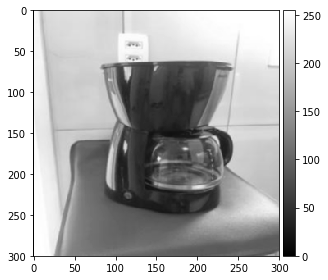

In [77]:
io.imshow(media_filtro(gray), cmap=plt.cm.gray)

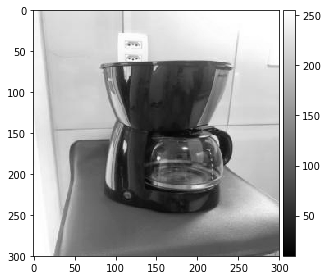

In [67]:
io.imshow(gray, cmap=plt.cm.gray)

In [114]:
def ExpImage(imagegray):
    width, height = imagegray.shape
    
    new = np.zeros([width, height])
    
    for i in range(width):
        for j in range(height):
            pixel = imagegray[i,j]
            expd = math.pow(1.02121,pixel)
            expd = expd/math.pow(1.02121,255)
            new[i,j] = expd*255
    
    return new

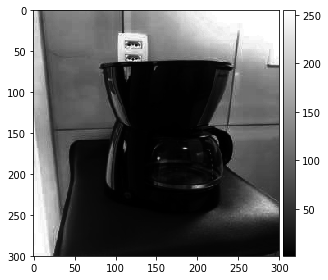

In [115]:
io.imshow(ExpImage(gray), cmap=plt.cm.gray)